###Sistema de Conducción Cardíaca con Osciladores de Van der Pol

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Sistema de Ecuaciones
\begin{align}
\mathbf{S A}: \dot{x}_{1}=& y_{1} \\
\dot{y}_{1}=&-a_{1}\nonumber y_{1}\left(x_{1}-u_{11}\right)\left(x_{1}-u_{12}\right) \nonumber \\
&-f_{1} x_{1}\left(x_{1}+d_{1}\right)\left(x_{1}+r_{1}\right) \nonumber\\
\mathbf{A V}: \dot{x}_{2}=& y_{2} \\
\dot{y}_{2}=&-a_{2}\nonumber y_{2}\left(x_{2}-u_{21}\right)\left(x_{2}-u_{22}\right)\nonumber \\
&-f_{2} x_{2}\left(x_{2}+d_{2}\right)\left(x_{2}+r_{2}\right)\nonumber \\
&+K_{S A-A V}\left(x_{1}-x_{2}\right) \nonumber\\
\mathbf{RB}: \dot{x}_{3}=& y_{3} \\
\dot{y}_{3}=&-a_{3}\nonumber y_{3}\left(x_{3}-u_{31}\right)\left(x_{3}-u_{32}\right) \nonumber\\
&-f_{3} x_3 (x_3 + d_3)(x_3 + r_3) \nonumber\\
&+K_{AV-RB}(x_2 -x_3)\nonumber\\
\mathbf{LB}: \dot{x}_{4}=& y_{4} \\
\dot{y}_{4}=&-a_{3}\nonumber y_{4}\left(x_{4}-u_{31}\right)\left(x_{4}-u_{32}\right)\nonumber\\
&-f_{3} x_4 (x_4 + d_3)(x_4 + r_3)\nonumber\\
&+K_{AV-LB}(x_2 -x_4)\nonumber
\end{align}

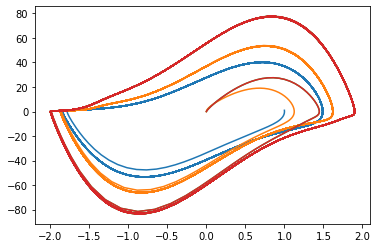

In [ ]:
#Osciladores de Van der Pol en la dinámica del corazón
def vdp(t,z,a1,a2,a3,k1,k2,k3,u11,u12,f1,d1,r1,u21,u22,f2,d2,r2,u31,u32,f3,d3,r3):
  x1=z[0]
  y1=z[1]
  x2=z[2]
  y2=z[3]
  x3=z[4]
  y3=z[5]
  x4=z[6]
  y4=z[7]
  return [y1,
          -a1*y1*(x1-u11)*(x1-u12)-f1*x1*(x1+d1)*(x1+r1),
          y2,
          -a2*y2*(x2-u21)*(x2-u22)-f2*x2*(x2+d2)*(x2+r2)+k1*(x1-x2),
          y3,
          -a3*y3*(x3-u31)*(x3-u32)-f3*x3*(x3+d3)*(x3+r3)+k2*(x2-x3),
          y4,
          -a3*y4*(x4-u31)*(x4-u32)-f3*x4*(x4+d3)*(x4+r3)+k3*(x2-x4)]

a,b=-1,15
t=np.linspace(a,b,6000)

#Parámetros del Sistema
a1,a2,a3=40,50,50
k1,k2,k3=100,285,285
u11,u12,u21,u22,u31,u32=0.83,-0.83,0.83,-0.83,0.83,-0.83
f1,f2,f3 = 25,8.4,1.5
d1,d2,d3=3,3,3
r1,r2,r3=3.5,5,12
"""
Prueba con dos condiciones iniciales fijas en [1,1,0,0,0,0,0,0]
es decir x1(0)=1 y y1(0)=1"""

sol=solve_ivp(vdp,[a,b],[1,1,0,0,0,0,0,0],args = (a1,a2,a3,k1,k2,k3,u11,u12,f1,d1,r1,u21,u22,f2,d2,r2,u31,u32,f3,d3,r3), t_eval=t, max_step=1e-2)

#fig = plt.figure(dpi=80)

plt.plot(sol.y[0], sol.y[1])
plt.plot(sol.y[2], sol.y[3])
plt.plot(sol.y[4], sol.y[5])
plt.plot(sol.y[6], sol.y[7])


Text(0, 0.5, 'y4')

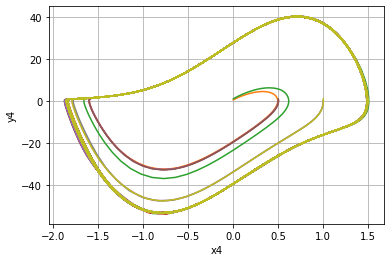

In [ ]:
a,b=-1,20
#Parámetros del Sistema
a1,a2,a3=40,50,50
#Trabajando de forma acoplada
#k1,k2,k3=100,285,285
#Trabajando de forma desacoplada
k1,k2,k3=0,0,0
u11,u12,u21,u22,u31,u32=0.83,-0.83,0.83,-0.83,0.83,-0.83
f1,f2,f3 = 25,8.4,1.5
d1,d2,d3=3,3,3
r1,r2,r3=3.5,5,12
"""Ciclos para los retrato de fase
con las condiciones iniciales xi(0)=z1 y yi(0)=z2
en xi contra yi con i=1,2,3,4"""
for z1 in np.linspace(0,1,3):
  for z2 in np.linspace(0,1,3):
    t=np.linspace(a,b,6000)
    #Condicion inicial x1(0)=z1 y y1(0)=z2
    sol=solve_ivp(vdp,[a,b],[z1,z2,0,0,0,0,0,0],
                  args = (a1,a2,a3,k1,k2,k3,u11,u12,f1,d1,r1,u21,u22,f2,d2,r2,u31,u32,f3,d3,r3),
                  t_eval=t, dense_output=True)
    f = sol.sol(t)
    plt.plot(f.T[:,0],f.T[:,1])
plt.grid()
plt.xlabel('x4')
plt.ylabel('y4')

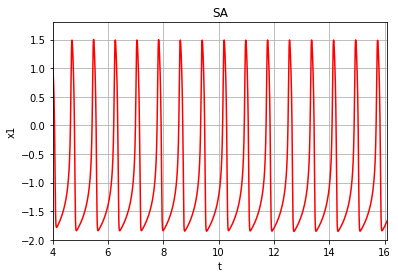

In [ ]:
a,b=4,16.1
t=np.linspace(a,b,5000)
a1,a2,a3=40,50,50
#Trabajando de forma acoplada
#k1,k2,k3=100,285,285
#Trabajando de forma desacoplada
k1,k2,k3=0,0,0
u11,u12,u21,u22,u31,u32=0.83,-0.83,0.83,-0.83,0.83,-0.83
f1,f2,f3 = 25,8.4,1.5
d1,d2,d3=3,3,3
r1,r2,r3=3.5,5,12

#Para las señales desacopladas y acopladas
sol=solve_ivp(vdp,[a,b],[1,0,1,0,1,0,1,0],
              args = (a1,a2,a3,k1,k2,k3,u11,u12,f1,d1,r1,u21,u22,f2,d2,r2,u31,u32,f3,d3,r3),
              t_eval=t)
plt.plot(sol.t, sol.y[0],'r')
plt.axis([a,b,-2,1.8])
plt.title("SA")
plt.xlabel('t')
plt.ylabel('x1')
plt.grid()

Text(0.5, 1.0, 'AV')

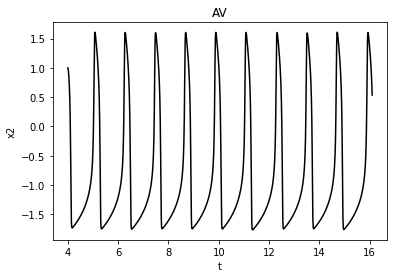

In [ ]:
plt.plot(sol.t, sol.y[2],'black')
plt.xlabel('t')
plt.ylabel('x2')
plt.title("AV")

Text(0, 0.5, 'x3')

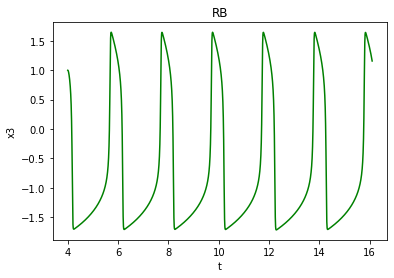

In [ ]:
plt.plot(sol.t, sol.y[4],'g')
plt.title("RB")
plt.xlabel('t')
plt.ylabel('x3')

Text(0, 0.5, 'x4')

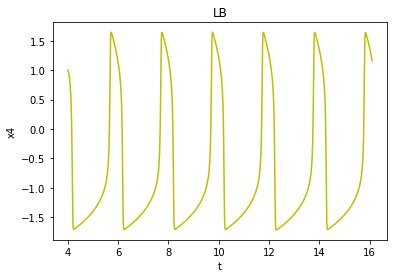

In [ ]:
plt.plot(sol.t, sol.y[6],'y')
plt.title("LB")
plt.xlabel('t')
plt.ylabel('x4')